In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-prediction-problem-dataset


In [37]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
# Download the dataset (replace with Kaggle dataset slug)
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset


Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 52.2MB/s]


In [10]:
!unzip loan-prediction-problem-dataset.zip


Archive:  loan-prediction-problem-dataset.zip
  inflating: test_Y3wMUE5_7gLdaTN.csv  
  inflating: train_u6lujuX_CVtuZ9i.csv  


In [11]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
print(df.shape)
print(df.dtypes)

(614, 13)
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [15]:
for col in ['Gender','Married','Self_Employed','Dependents','Credit_History','Loan_Amount_Term']:
  df[col].fillna(df[col].mode()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)



/tmp/ipython-input-15-308041972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
/tmp/ipython-input-15-308041972.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [16]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Income_Loan_Ratio']=df['Total_Income']/df['LoanAmount']
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
df['Married_SE']=df['Married']+"_"+ df['Self_Employed']

In [18]:
from sklearn.preprocessing import LabelEncoder

binary_cols=['Gender','Married','Education','Self_Employed','Loan_Status']
for col in binary_cols:
  df[col]=LabelEncoder().fit_transform(df[col])


df=pd.get_dummies(df,columns=['Property_Area','Married_SE','Dependents'],drop_first=True)





In [19]:
X=df.drop(columns=['Loan_ID','Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount'])
y=df['Loan_Status']

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

dt=DecisionTreeClassifier(max_depth=4,random_state=42)
dt.fit(X_train,y_train)

y_pred_dt=dt.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))


Decision Tree Accuracy: 0.8130081300813008
              precision    recall  f1-score   support

           0       0.86      0.56      0.68        43
           1       0.80      0.95      0.87        80

    accuracy                           0.81       123
   macro avg       0.83      0.75      0.77       123
weighted avg       0.82      0.81      0.80       123



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.8048780487804879
              precision    recall  f1-score   support

           0       0.88      0.51      0.65        43
           1       0.79      0.96      0.87        80

    accuracy                           0.80       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.82      0.80      0.79       123



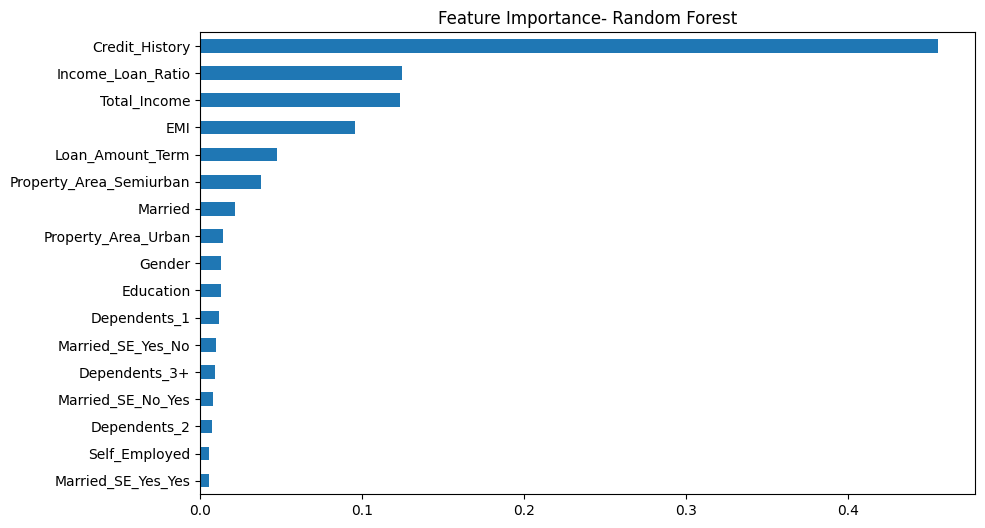

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance=pd.Series(rf.feature_importances_,index=X.columns)
feat_importance.sort_values().plot(kind='barh',figsize=(10,6))
plt.title("Feature Importance- Random Forest")
plt.show()

In [24]:
import joblib
joblib.dump(rf,'loan_default_model.pkl')

['loan_default_model.pkl']